In [44]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix
import itertools

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [46]:
print('Data shape atau dimensi data: (Jumlah data, Tinggi piksel, Lebar piksel)', x_train.shape)
print('Bentuk dari sisi data: \n')
x_train[3]

Data shape atau dimensi data: (Jumlah data, Tinggi piksel, Lebar piksel) (60000, 28, 28)
Bentuk dari sisi data: 



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [47]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

In [48]:
print('Data yang diubah menjadi 2 dimensi: ')
x_train[1] #hasil reshape

Data yang diubah menjadi 2 dimensi: 


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [49]:
# normalisasi tingkat kecerahan (0 - 255) menjadi (0 - 1)
x_train = x_train/255.0
x_test = x_test/255.0

In [50]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
from tensorflow.keras.utils import to_categorical #membuat label folder dataset menjadi kategori/kelas-kelas
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [52]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [53]:
num_input = 28 * 28 # jumlah input vektor

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, input_dim = num_input, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [54]:
hist = model.fit(x_train, y_train, 
                 epochs = 15,
                 batch_size = 200,
                 validation_data = (x_test, y_test))

Epoch 1/15
300/300 [==============================] - 1s 4ms/step - loss: 0.3011 - accuracy: 0.9166 - val_loss: 0.1502 - val_accuracy: 0.9560
Epoch 2/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9644 - val_loss: 0.1060 - val_accuracy: 0.9692
Epoch 3/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.0854 - val_accuracy: 0.9747
Epoch 4/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0606 - accuracy: 0.9831 - val_loss: 0.0711 - val_accuracy: 0.9784
Epoch 5/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9868 - val_loss: 0.0672 - val_accuracy: 0.9801
Epoch 6/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9903 - val_loss: 0.0688 - val_accuracy: 0.9794
Epoch 7/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.0628 - val_accuracy: 0.9800
Epoch 

In [55]:
model.save_weights('model_weights.h5')

In [58]:
from matplotlib.gridspec import tight_layout
def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  plt.figure(figsize = (10, 10))
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 90)
  plt.yticks(tick_marks, classes)
  if normalize :
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i, j],
              horizontalalignment='center',
              color='white' if cm[i, j] > thresh else 'black')
  plt.grid('off')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

313/313 [==============================] - 0s 1ms/step


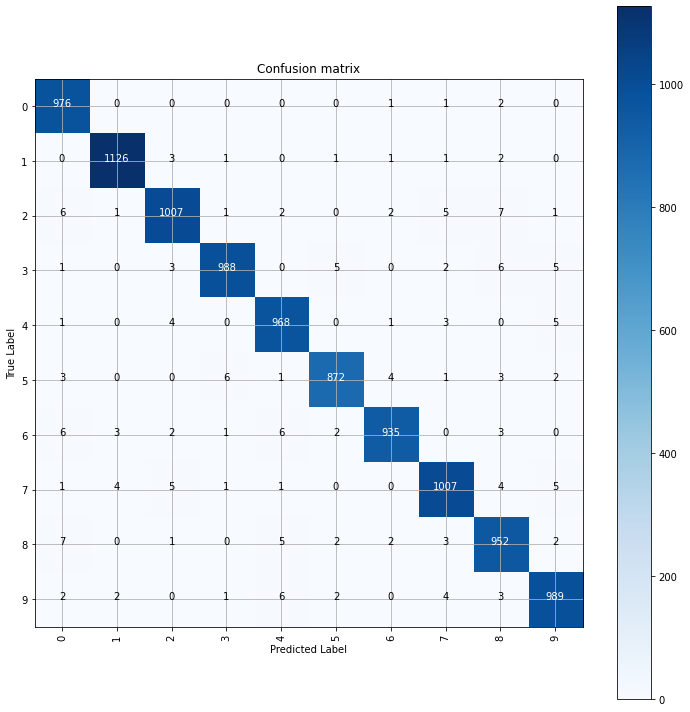

In [59]:
list_classes = [0,1,2,3,4,5,6,7,8,9]
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = list_classes)

In [60]:
img = x_test[8888]
predicted = model.predict(np.reshape(img, (1,784)))
predicted

1/1 [==============================] - 0s 18ms/step


array([[1.4451934e-09, 7.0285947e-12, 7.6886686e-10, 4.5827253e-13,
        1.8628339e-07, 3.9378895e-12, 9.9999976e-01, 1.6997920e-15,
        9.6676421e-13, 1.4636399e-14]], dtype=float32)

In [61]:
predictednumber = np.argmax(predicted)
predictednumber

6

In [62]:
np.argmax(y_test[8888])

6

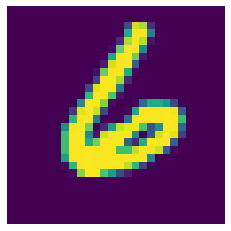

In [64]:
plt.imshow(np.reshape(x_test[8888], (28, 28)))
plt.axis('off')
plt.show()